# Global Power Plant Database
### Problem Statement:
### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database
   - `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
   - `country_long` (text): longer form of the country designation
   - `name` (text): name or title of the power plant, generally in Romanized form
   - `gppd_idnr` (text): 10 or 12 character identifier for the power plant
   - `capacity_mw` (number): electrical generating capacity in megawatts
   - `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
   - `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
   - `primary_fuel` (text): energy source used in primary electricity generation or export
   - `other_fuel1` (text): energy source used in electricity generation or export
   - `other_fuel2` (text): energy source used in electricity generation or export
   - `other_fuel3` (text): energy source used in electricity generation or export
    - `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
   - `owner` (text): majority shareholder of the power plant, generally in Romanized form
   - `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
   - `url` (text): web document corresponding to the `source` field
   - `geolocation_source` (text): attribution for geolocation information
   - `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
   - `year_of_capacity_data` (number): year the capacity information was reported
   - `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
   - `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
   - `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
   - `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
   - `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
   - `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
   - `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
   - `generation_data_source` (text): attribution for the reported generation information
   - `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
   - `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
   - `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
   - `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
   - `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
   - 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
   - `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
   - `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
   - `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
   - `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017


### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  
   1) Primary Fuel    
   2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

# ---------------------------------------Loading Libraries----------------------------------------------

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler  

pd.pandas.set_option('display.max_columns',None)  # To display, all columns
pd.pandas.set_option('display.max_rows',None)  # To display, all columns

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Reading File¶/

In [4]:
df = pd.read_csv('database_IND.csv')

## 1. Overall Data Analysis¶

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (907, 27)


In [6]:
df.shape

(907, 27)

In [7]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [8]:
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
902          NaN              2016.0                                  NaN   
903          NaN                 NaN  Karnataka Power Corporation Limited   
904          NaN                 NaN                                  NaN   
905          NaN                 NaN                   Hindustan Zinc ltd   
906          NaN                 NaN                   iEnergy Wind Farms   

                                  source  \
902        Central Electricity Authority   
903  Karnataka Power Corporation Limited   
904                                  CDM   
905                   Hindustan Zinc ltd   
906                                  CDM   

                                                   url geolocation_source  \
902                             http://www.cea.nic.in/                WRI   
903                          http://karnatakapower.com     Industry About   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...                WRI   
905                           http://www.hzlindia.com/                WRI   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...                WRI   

     wepp_id  year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
902      NaN                 2019.0                  NaN                  NaN   
903      NaN                    NaN                  NaN                  NaN   
904      NaN                    NaN                  NaN                  NaN   
905      NaN                    NaN                  NaN                  NaN   
906      NaN                    NaN                  NaN                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
902             0.994875            233.59665                865.4   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN

In [9]:
df.sample(10)

country country_long                              name   gppd_idnr  \
502     IND        India                 Megha Solar Plant  WRI1020245   
14      IND        India                 ANOOPGARH ST I&II  IND0000012   
865     IND        India                          VAITARNA  IND0000493   
791     IND        India                        TANIR BAVI  IND0000444   
184     IND        India                        DUDH GANGA  IND0000106   
664     IND        India        Rasulpur Solar Power Plant  WRI1026194   
536     IND        India               NIMBAHERA JK CEMENT  WRI1019894   
399     IND        India  Katol - Sepset Solar Power Plant  WRI1026156   
364     IND        India                        KORBA STPS  IND0000209   
31      IND        India            Arasinagundi Wind Farm  WRI1026068   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
502         50.0       NaN        NaN        Solar         NaN         NaN   
14           9.0       NaN        NaN        Hydro         NaN         NaN   
865         60.0   19.7674    73.5020        Hydro         NaN         NaN   
791        220.0   12.9019    74.8160          Gas         NaN         NaN   
184         24.0   16.3537    74.0095        Hydro         NaN         NaN   
664          1.0   27.9363    75.6790        Solar         NaN         NaN   
536         33.2   24.6428    74.6843         Coal         NaN         NaN   
399          2.0   21.3174    78.6001        Solar         NaN         NaN   
364       2600.0   22.3881    82.6858         Coal         Oil         NaN   
31          13.2   14.4791    76.3482         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                 owner  \
502          NaN              2014.0  Megha Engineering and Infrastructure   
14           NaN              1987.0                                   NaN   
865          NaN              1976.0                                   NaN   
791          NaN              2001.0                                   NaN   
184          NaN              2000.0                                   NaN   
664          NaN                 NaN    Ganges Enterprises Private Limited   
536          NaN                 NaN                         Jk Cement ltd   
399          NaN                 NaN           Sepset Construction Limited   
364          NaN              1991.0                                   NaN   
31           NaN                 NaN                                   NaN   

                                                source  \
502               National Renewable Energy Laboratory   
14                       Central Electricity Authority   
865                      Central Electricity Authority   
791                      Central Electricity Authority   
184                      Central Electricity Authority   
664  Rajasthan Renewable Energy Corporation Limited...   
536                                      Jk Cement ltd   
399                              Sepset Constructio te   
364                      Central Electricity Authority   
31                                                 CDM   

                                                   url geolocation_source  \
502  http://www.nrel.gov/csp/solarpaces/project_det...                NaN   
14                              http://www.cea.nic.in/                WRI   
865                             http://www.cea.nic.in/                WRI   
791                             http://www.cea.nic.in/                WRI   
184                             http://www.cea.nic.in/                WRI   
664  http://energy.rajasthan.gov.in/content/dam/raj...     Industry About   
536  http://www.moneycontrol.com/india/stockpricequ...                WRI   
399  http://www.mahaurja.com/PDF/PG2_GridConnSPPCom...     Industry About   
364                             http://www.cea.nic.in/                WRI   
31   https://cdm.unfccc.int/Projects/DB/DNV-CUK1216...        

In [10]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
# Removing duplicate values
df.duplicated().sum()

0

### Observations - 
- The shape of Data set is (907, 27), Where 907 are number of records and 27 are number of columns.
- There are no duplicate values in dataset.
- Need to Predict Two Values:
   1. primary_fuel - This makes us to follow and Use Classificaton Algorithms (O/p as Category)
   2. capacity_mw - This makes follow and Use Regression Algorithms (O/p as Numerical Value)

## 2. Getting to Know More About Data

In [12]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

## 3 Gettting to Know Five Number Summery for Continuous variable

In [13]:
df.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

### Observations -
- Looking at count column, there are too many missing values.
- Data distribution and their importance as follows - 
    1. capacity_mw
        - No missing values
        - Average power generation is 326.22 mw
        - With no power generation as minimum and maximum power generation as 0 mw and 4760 mw
        - 50% of Indian power plants generates power less than 50%
    2.  latitude: Location of Plant
        - Around 907 - 861 = 46 Missing values
    3.  longitude: Location of Plant
        - Around 907 - 861 = 46 Missing values
        - The centre point which connects all power plants is lat = 21.197918, long = 77.464907. Located near amravati.
    4.  other_fuel3
        - Can drop this feature
        - There are no values in this feature
    5.  commissioning_year
        - Date data, ranging from 1927 to 2018.
    6.  wepp_id
        - Can drop this feature
        - There are no values in this feature
    7.  year_of_capacity_data
        - Date data, with fixed value as 2019
    8.  generation_gwh_2013
        - Can drop this feature
        - There are no values in this feature
    9.  generation_gwh_2014
        - Around 907 - 398 = 509 Missing values
    10. generation_gwh_2015
        - Around 907 - 422 = 485 Missing values
    11. generation_gwh_2016
        - Around 907 - 434 = 473 Missing values
    12. generation_gwh_2017
        - Around 907 - 440 = 467 Missing values
    13. generation_gwh_2018
        - Around 907 - 448 = 459 Missing values
    14. generation_gwh_2019
        - Can drop this feature
        - There are no values in this feature
    15. estimated_generation_gwh
        - Can drop this feature
        - There are no values in this feature

## 4 Gettting to Know about Categorical Variable

In [14]:
df.describe(include="O")

country country_long              name   gppd_idnr primary_fuel  \
count      907          907               907         907          907   
unique       1            1               907         907            8   
top        IND        India  ACME Solar Tower  WRI1020239         Coal   
freq       907          907                 1           1          258   

       other_fuel1 other_fuel2        owner                         source  \
count          198           1          342                            907   
unique           3           1          280                            191   
top            Oil         Oil  Acc Acc ltd  Central Electricity Authority   
freq           195           1            4                            519   

                           url geolocation_source  \
count                      907                888   
unique                     304                  3   
top     http://www.cea.nic.in/                WRI   
freq                       519                765   

               generation_data_source  
count                             449  
unique                              1  
top     Central Electricity Authority  
freq                              449

### Observations -
There are some missing values in other_fuel1, other_fuel2, owner, geolocation_source, generation_data_source.
Categories as follows
1. country
    - Can drop this column, as only one category
2. country_long
    - Can drop this column, as only one category
3. name
    - Can drop this column, as there are 907 unique values
4. gppd_idnr
    - As it is identifier, We Can drop this column, as there are 907 unique values.
5. primary_fuel
    - There are total 8 categories, with mode of Coal being 258 times out of 907 times.
6. other_fuel1
    - There are total 3 categories, with mode of Oil being 195 times out of 198 times.
7. other_fuel2
    - Can drop this column, as only one category
8. owner
    - Can drop this column, as there are 280 owners
    - There is plant named Acc Acc ltd. with 4 plants in India
9. source
    - Can drop this column, as there are 191 categories
10. url
    - Can drop this column, as it dosent play important role in finding output
11. geolocation_source
    - There are 3 geological resources, with mode being WRI with 765.
12. generation_data_source
    - Can drop this column, as only one category


### Important Features
1. primary_fuel
2. other_fuel1
3. geolocation_source

In [15]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

country: Number of unique values 1
country_long: Number of unique values 1
name: Number of unique values 907
gppd_idnr: Number of unique values 907
capacity_mw: Number of unique values 361
latitude: Number of unique values 836
longitude: Number of unique values 827
primary_fuel: Number of unique values 8
other_fuel1: Number of unique values 3
other_fuel2: Number of unique values 1
other_fuel3: Number of unique values 0
commissioning_year: Number of unique values 73
owner: Number of unique values 280
source: Number of unique values 191
url: Number of unique values 304
geolocation_source: Number of unique values 3
wepp_id: Number of unique values 0
year_of_capacity_data: Number of unique values 1
generation_gwh_2013: Number of unique values 0
generation_gwh_2014: Number of unique values 371
generation_gwh_2015: Number of unique values 396
generation_gwh_2016: Number of unique values 403
generation_gwh_2017: Number of unique values 408
generation_gwh_2018: Number of unique values 410
gene

### Observation - 
After checking relation with Power generation and Primary Fuel, finally we can drop some columns.

## Dropping Features, which does not play important role in regression and Classification problem.

In [16]:
df.drop('country', inplace=True, axis=1)

In [17]:
df.drop('country_long', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)
df.drop('gppd_idnr', inplace=True, axis=1)
df.drop('other_fuel2', inplace=True, axis=1)
df.drop('owner', inplace=True, axis=1)
df.drop('source', inplace=True, axis=1)
df.drop('url', inplace=True, axis=1)
df.drop('generation_data_source', inplace=True, axis=1)

In [18]:
df.drop('other_fuel3', inplace=True, axis=1)
df.drop('generation_gwh_2013', inplace=True, axis=1)
df.drop('wepp_id', inplace=True, axis=1)
df.drop('generation_gwh_2019', inplace=True, axis=1)
df.drop('estimated_generation_gwh', inplace=True, axis=1)

# --------------------------------------------------EDA------------------------------------------------------

## 1 Seperating Data as categorical and Numerical Data

In [19]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [20]:
categorical_features

['primary_fuel', 'other_fuel1', 'geolocation_source']

In [21]:
numerical_features

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [22]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 3
Total Numerical Features are 10


### Observation -
- Total Categorical features are 12
- Total Numerical Features are 15

## 2 Plotting to understand Data Distribution

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


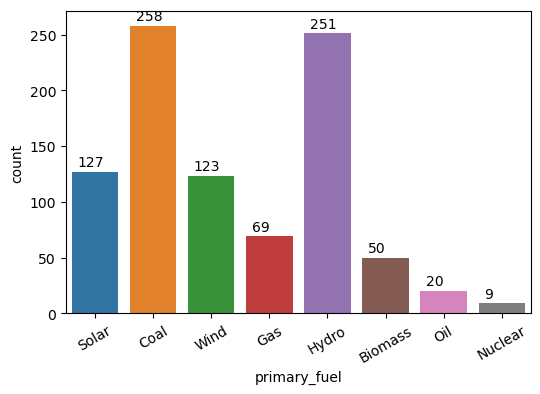

In [23]:
# Countplot for primary_fuel
plt.figure(dpi=100)
plot = sns.countplot('primary_fuel',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.primary_fuel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- Hydro and Coal are two major power generating resources in India, with total 258 plants for Coal and 251 plants for Hydro.
- Third highest power generation industry is Solar, followed by Wind Power Generation.
- Nuclear power shares only 9 power plants in India for Power Generation.

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


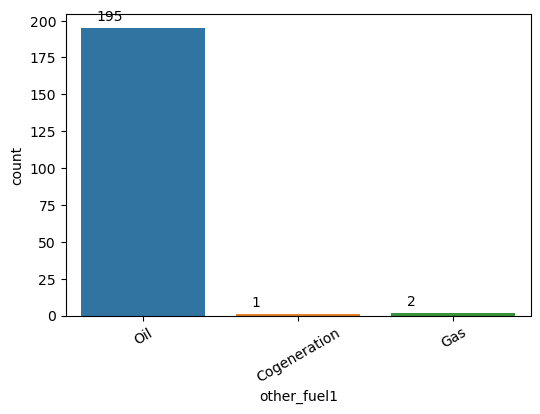

In [24]:
# Countplot for other_fuel1
plt.figure(dpi=100)
plot = sns.countplot('other_fuel1',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.other_fuel1.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation -
- There is only one category contributing in other fuels, and it is Oil.
- Very less power plants generates power by any other means.

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


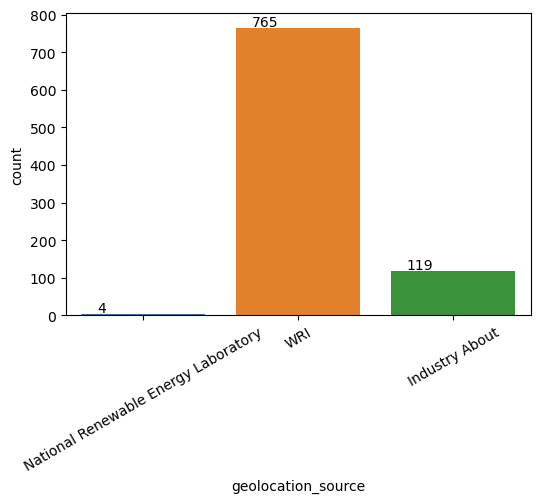

In [25]:
# Countplot for geolocation_source
plt.figure(dpi=100)
plot = sns.countplot('geolocation_source',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.geolocation_source.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- There are total three categories with WRI sharing max. as 765.
- There are 119 companies are about Industry
- National Renewable Energy Laboratory sharing only 4.

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


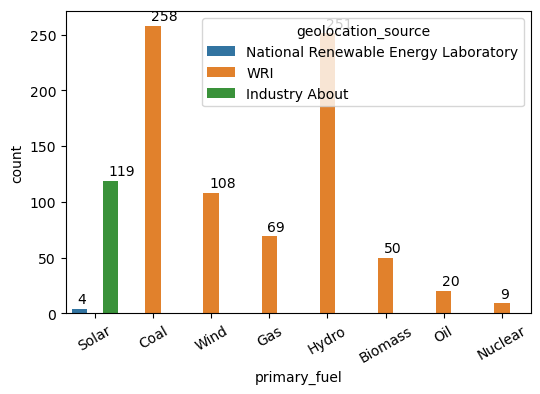

In [26]:
# Countplot for primary_fuel
plt.figure(dpi=100)
plot = sns.countplot('primary_fuel',data=df, hue='geolocation_source')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.primary_fuel.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


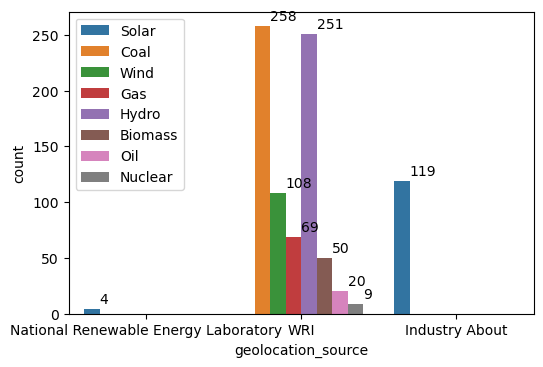

In [27]:
# Countplot for other_fuel1
plt.figure(dpi=100)
plot = sns.countplot('geolocation_source',data=df, hue='primary_fuel')
# plot.set_xticklabels(plot.get_xticklabels(),rotation = 50)
plt.legend(loc='upper left')
print(df.geolocation_source.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- Solar:
    1. 119 Plants producting energy for Industry
    2. 4 plants are in National Renewable Energy Laboratory
    3. Only Industries and NREL (National Renewable Energy Laboratory) using solar energy
- Coal, Wind, Gas, Hydro, Biomass, Oil and Nuclear
    1. All are used by only one category, and it is WRI.

<Figure size 6000x6000 with 0 Axes>

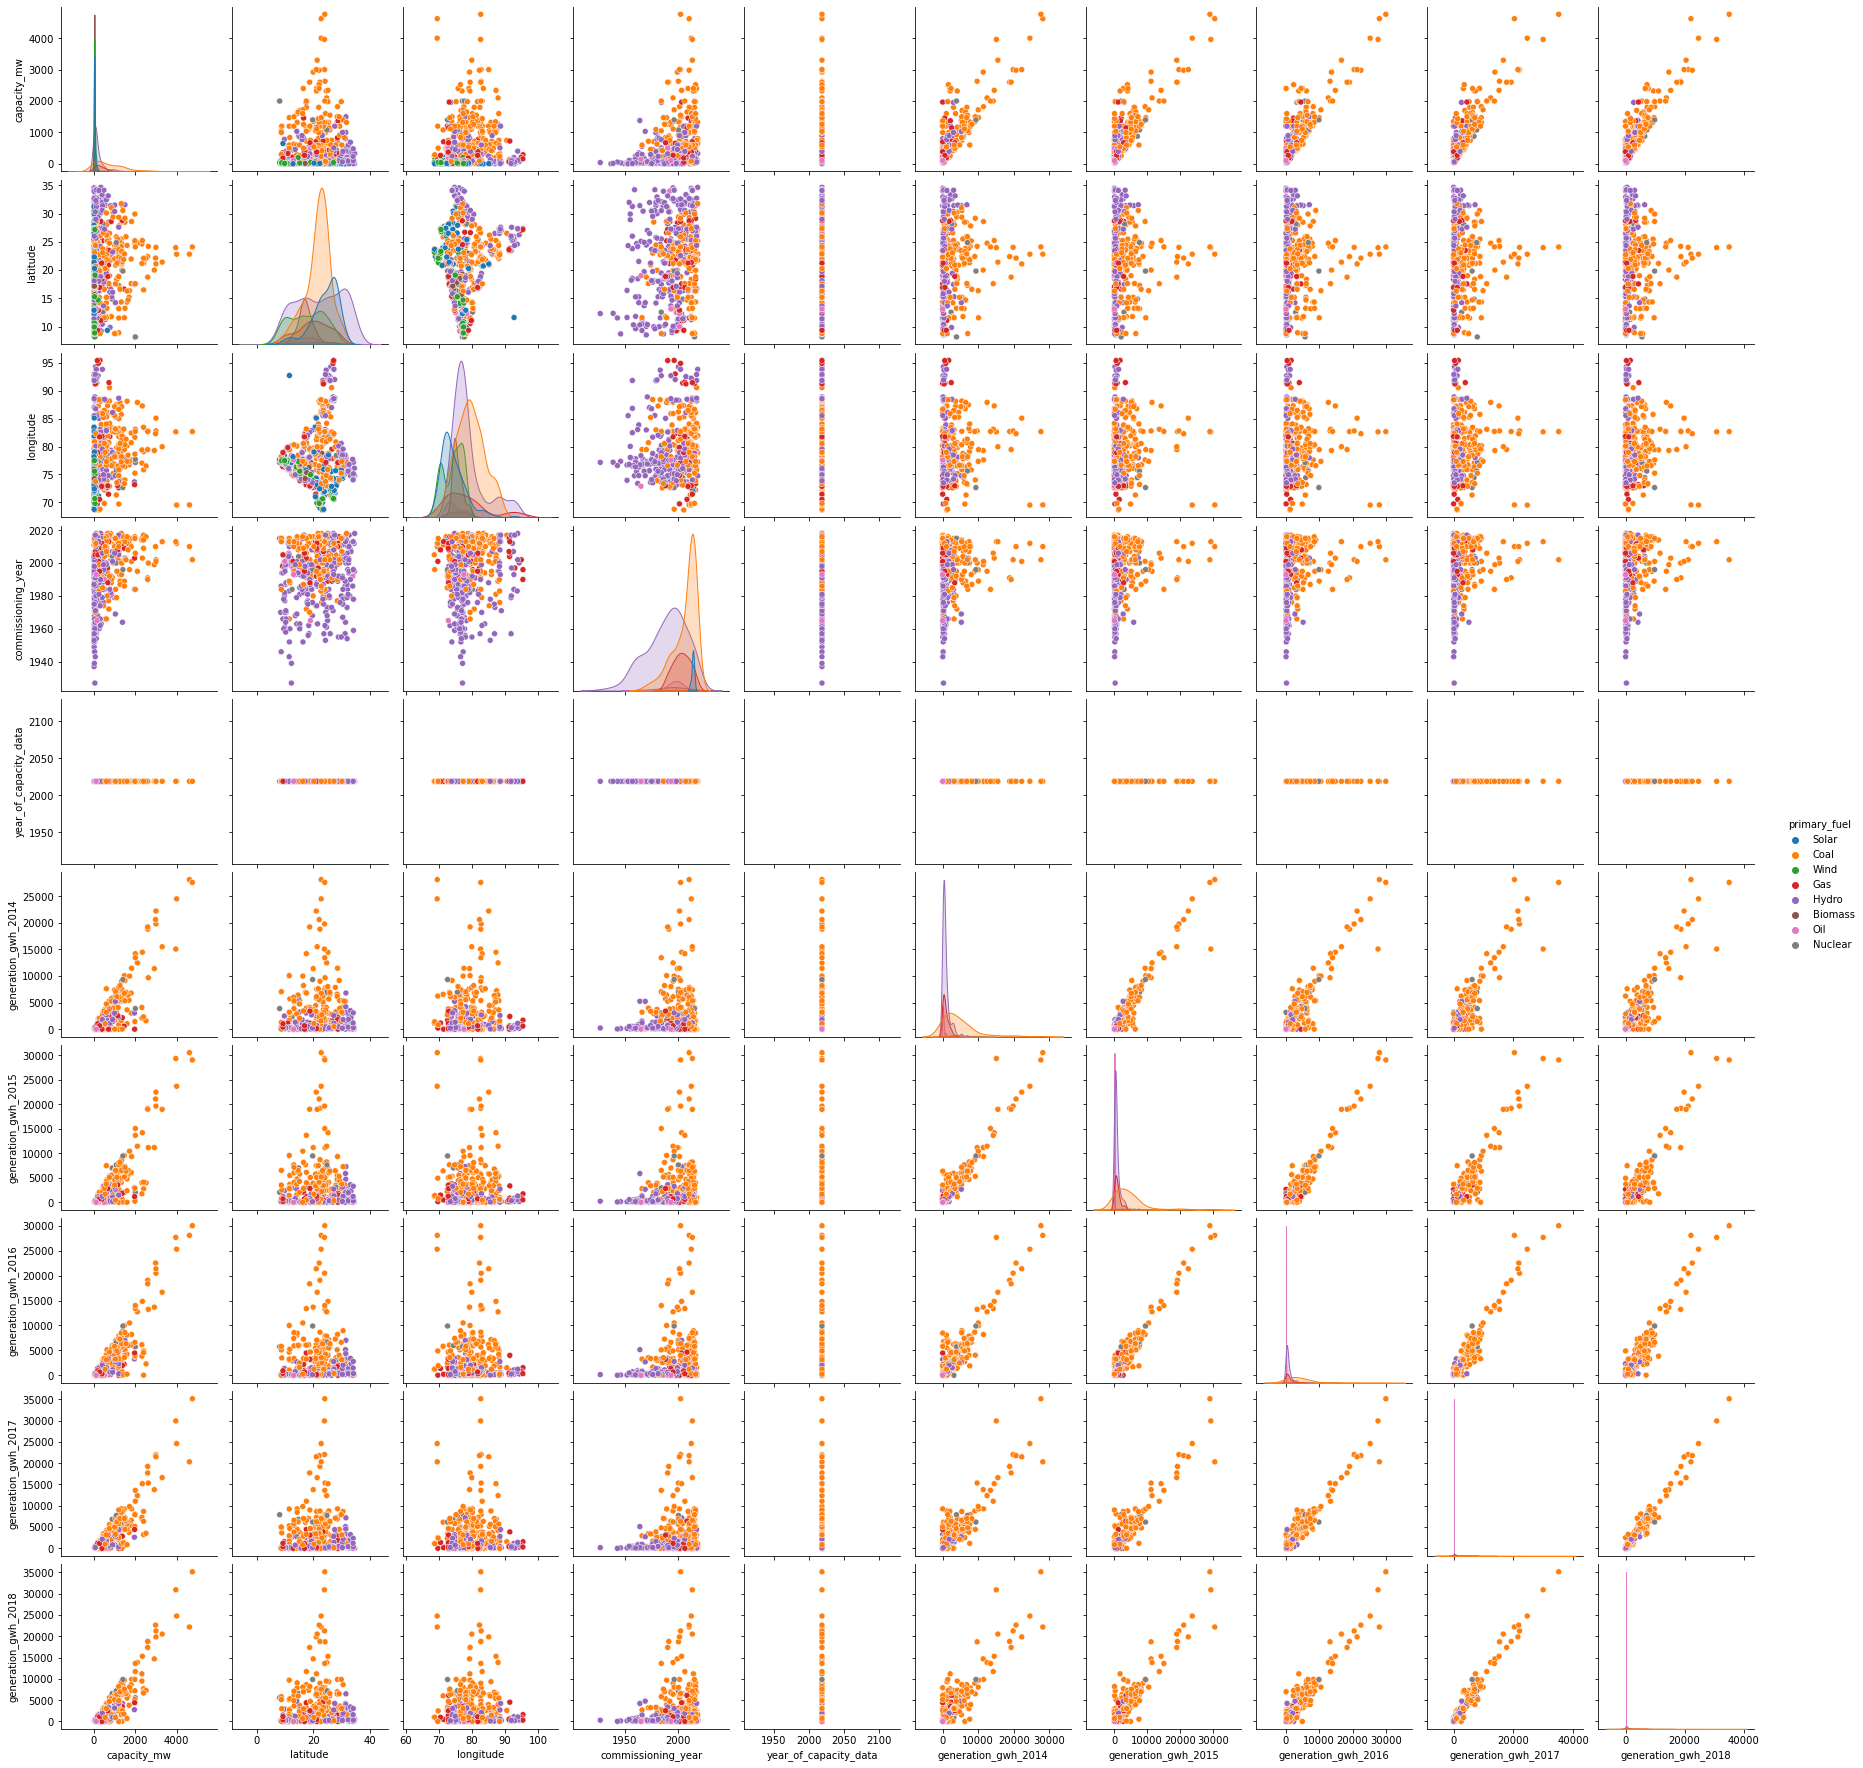

In [28]:
# Scatter plot by 'Outlet_Size'
plt.figure(figsize=(24,24), dpi=250)
sns.pairplot(df, hue='primary_fuel')

### Observations - 
From above plots, it is clear that
- With increase in years, power generation rate also increases.
- There are outliers in out data set
- Dropping columns with 50% of missing values is not important
- Data distribution shows skewness and presence of outliers in values

# ------------------------------------ Handling Outliers ----------------------------------------------¶

capacity_mw                 AxesSubplot(0.125,0.787927;0.168478x0.0920732)
latitude                 AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
longitude                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
commissioning_year       AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
year_of_capacity_data       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
generation_gwh_2014      AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
generation_gwh_2015      AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
generation_gwh_2016      AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
generation_gwh_2017         AxesSubplot(0.125,0.566951;0.168478x0.0920732)
generation_gwh_2018      AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
dtype: object

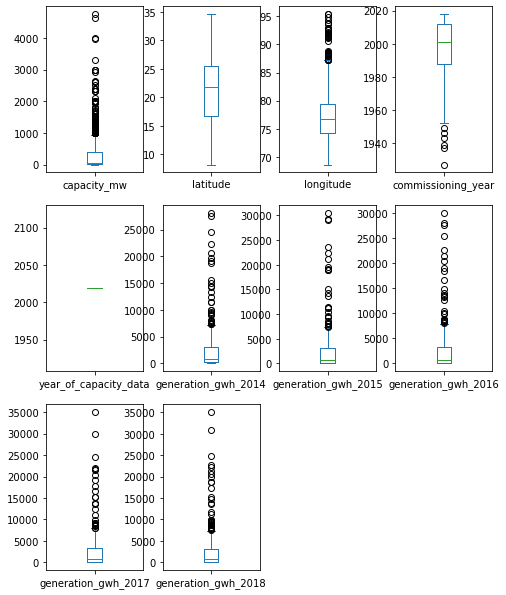

In [29]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [30]:
cols_with_outliers = ['capacity_mw','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

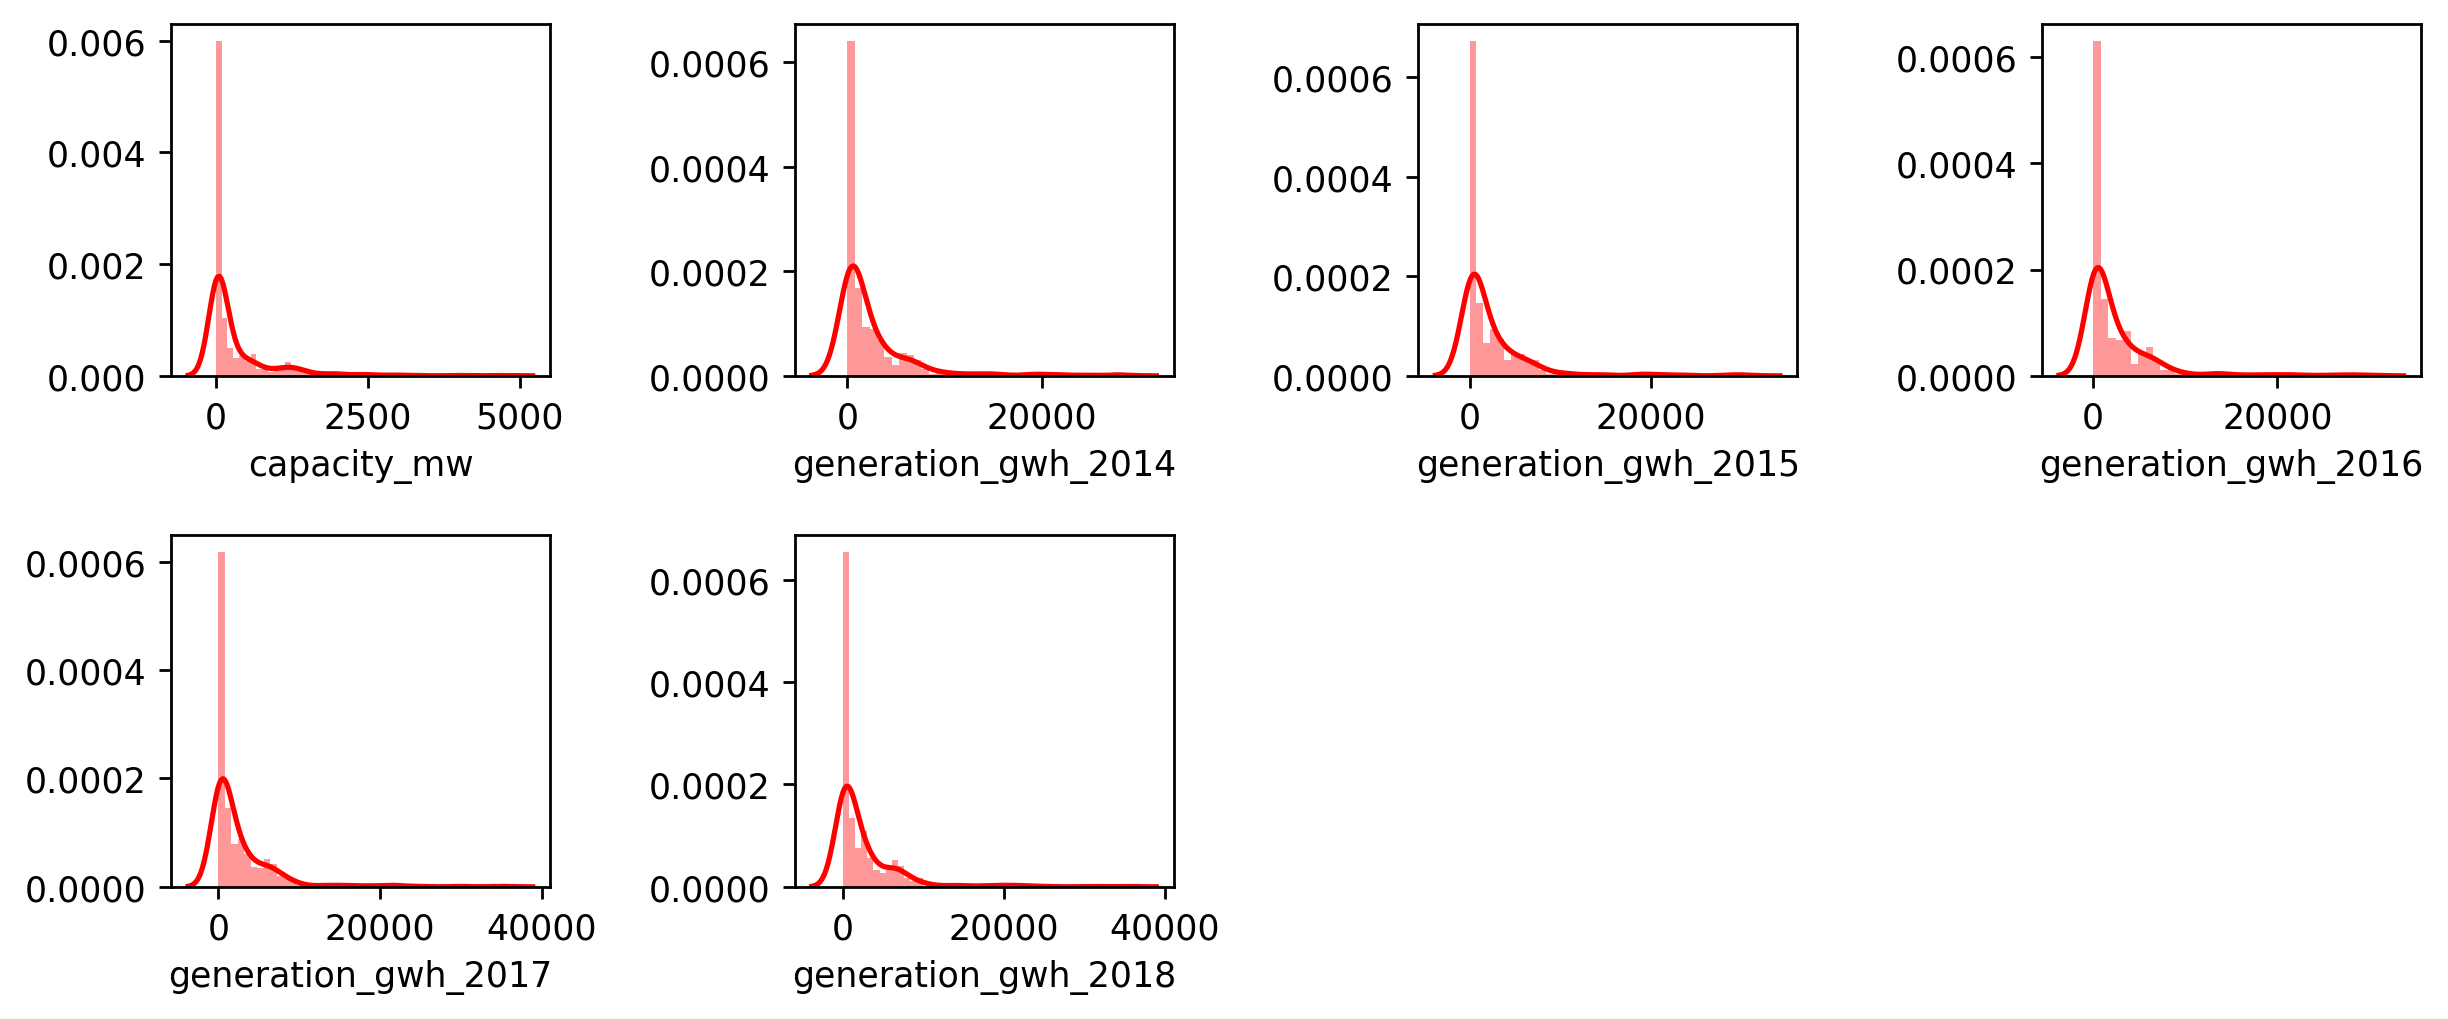

In [31]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [32]:
for feature in cols_with_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

capacity_mw                 AxesSubplot(0.125,0.787927;0.168478x0.0920732)
latitude                 AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
longitude                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
commissioning_year       AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
year_of_capacity_data       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
generation_gwh_2014      AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
generation_gwh_2015      AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
generation_gwh_2016      AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
generation_gwh_2017         AxesSubplot(0.125,0.566951;0.168478x0.0920732)
generation_gwh_2018      AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
dtype: object

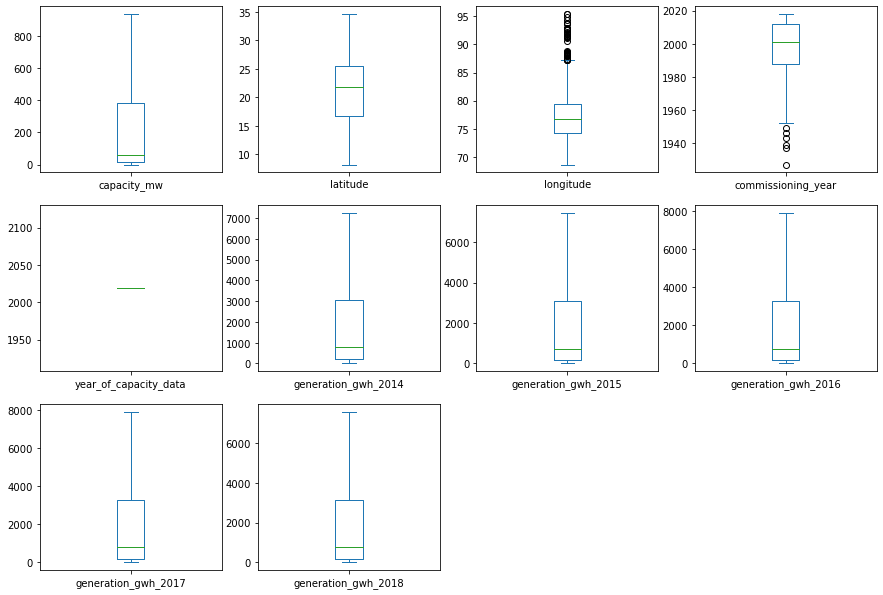

In [33]:
df.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

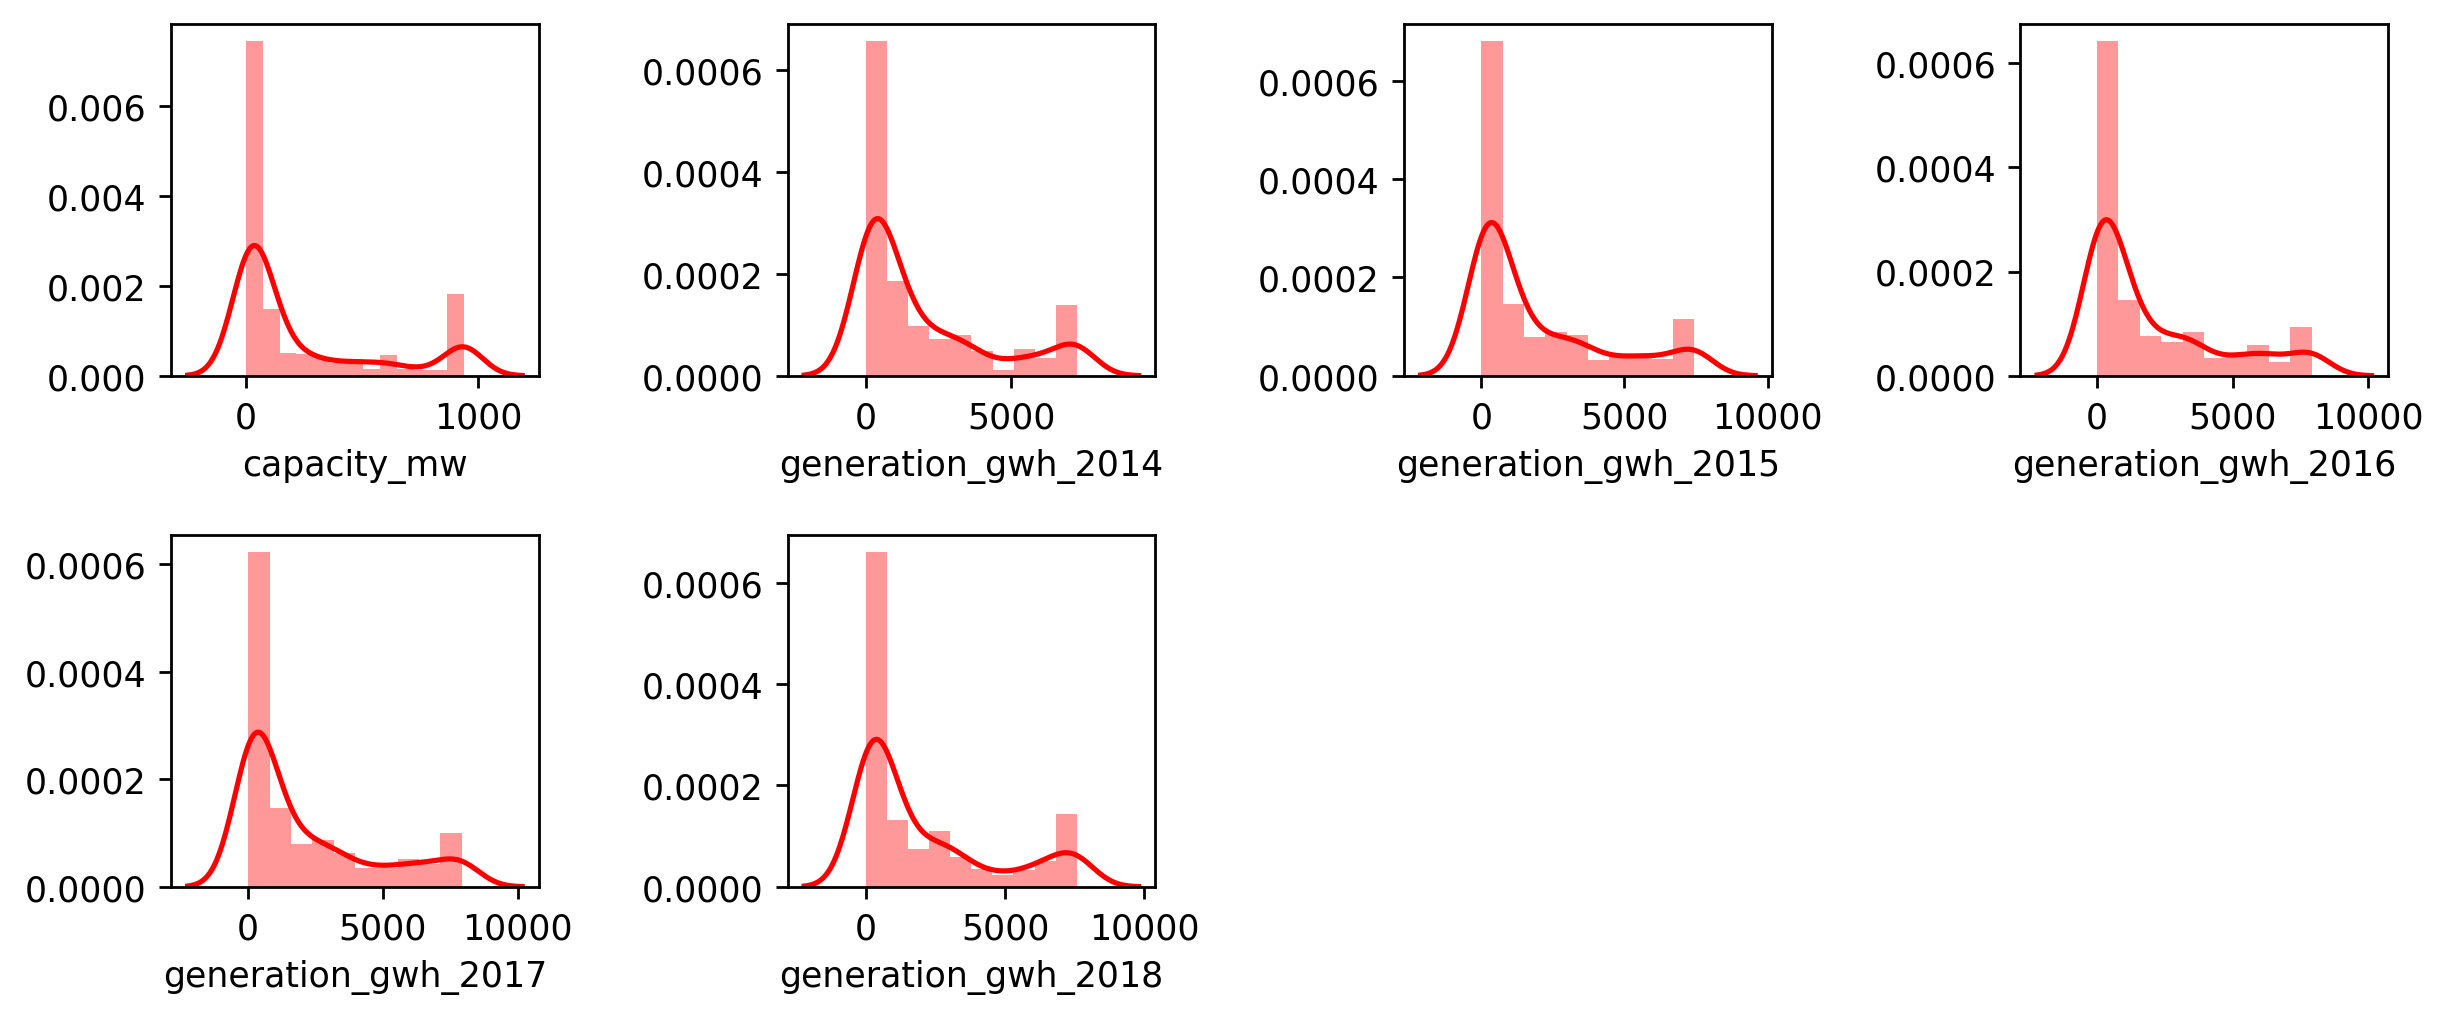

In [34]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

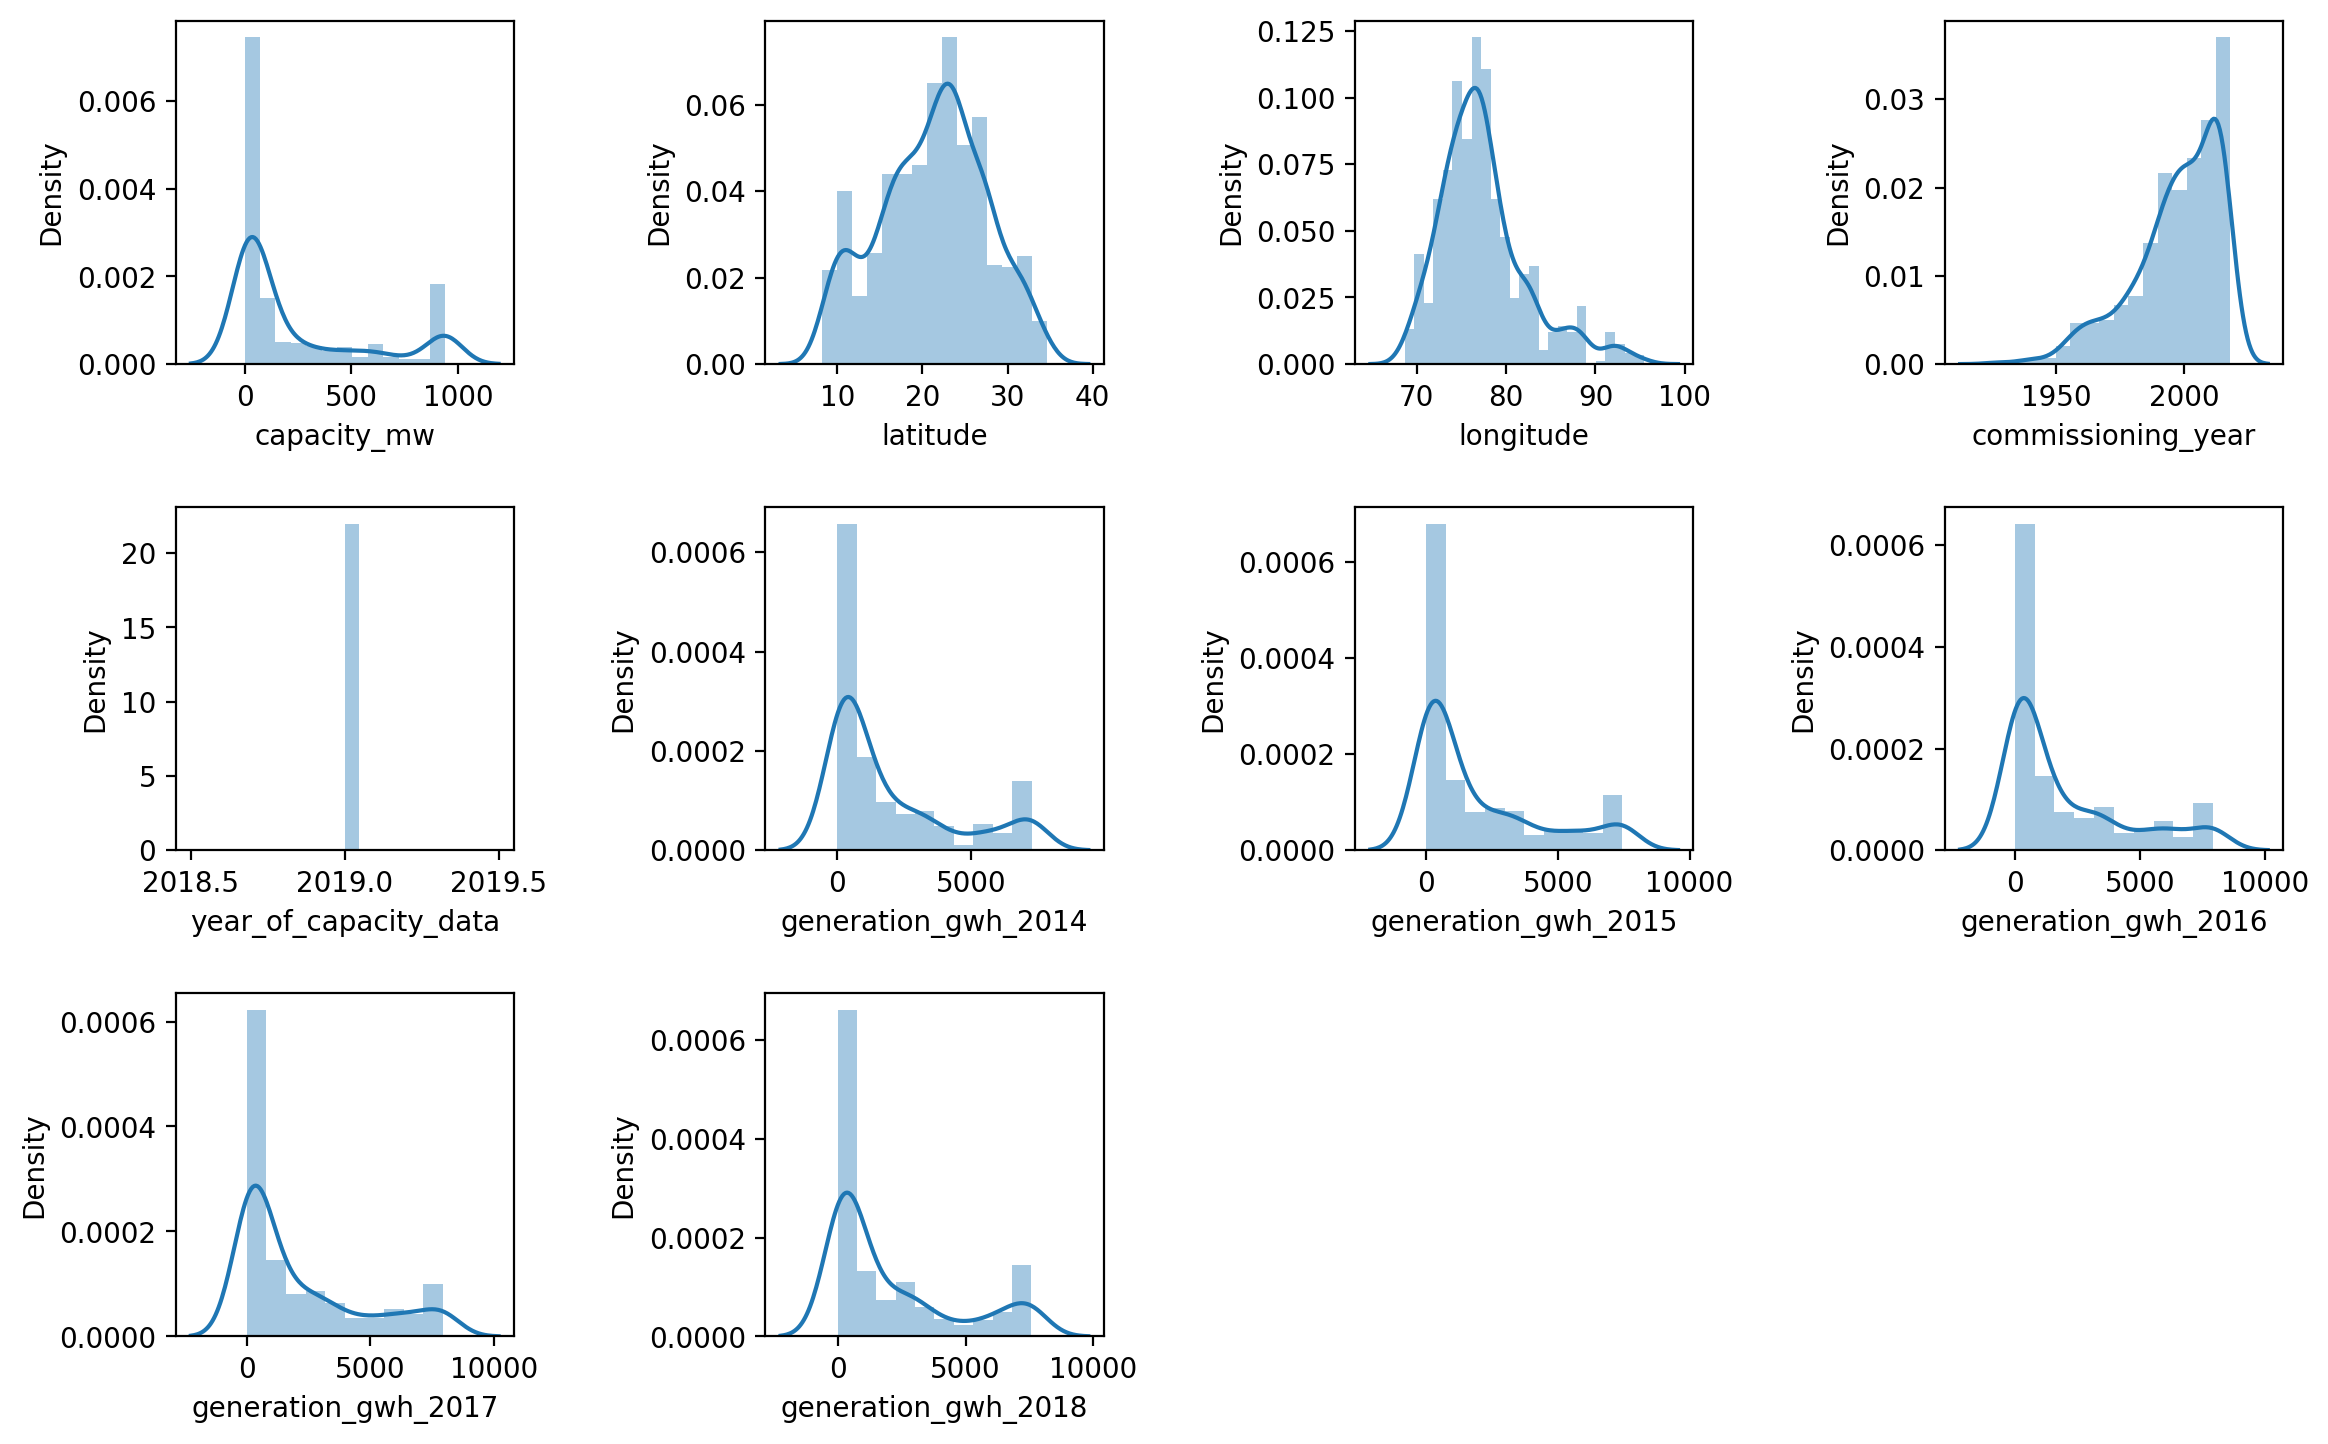

In [35]:
plt.figure(figsize=(12,12),dpi=200)
for i in enumerate(df[numerical_features]):
    plt.subplot(5,4,i[0]+1)
    sns.distplot(df[i[1]])
    plt.tight_layout(pad=2.0)

### Observation - 
- Now data is ready for model building.

## Checking correlation

<AxesSubplot:>

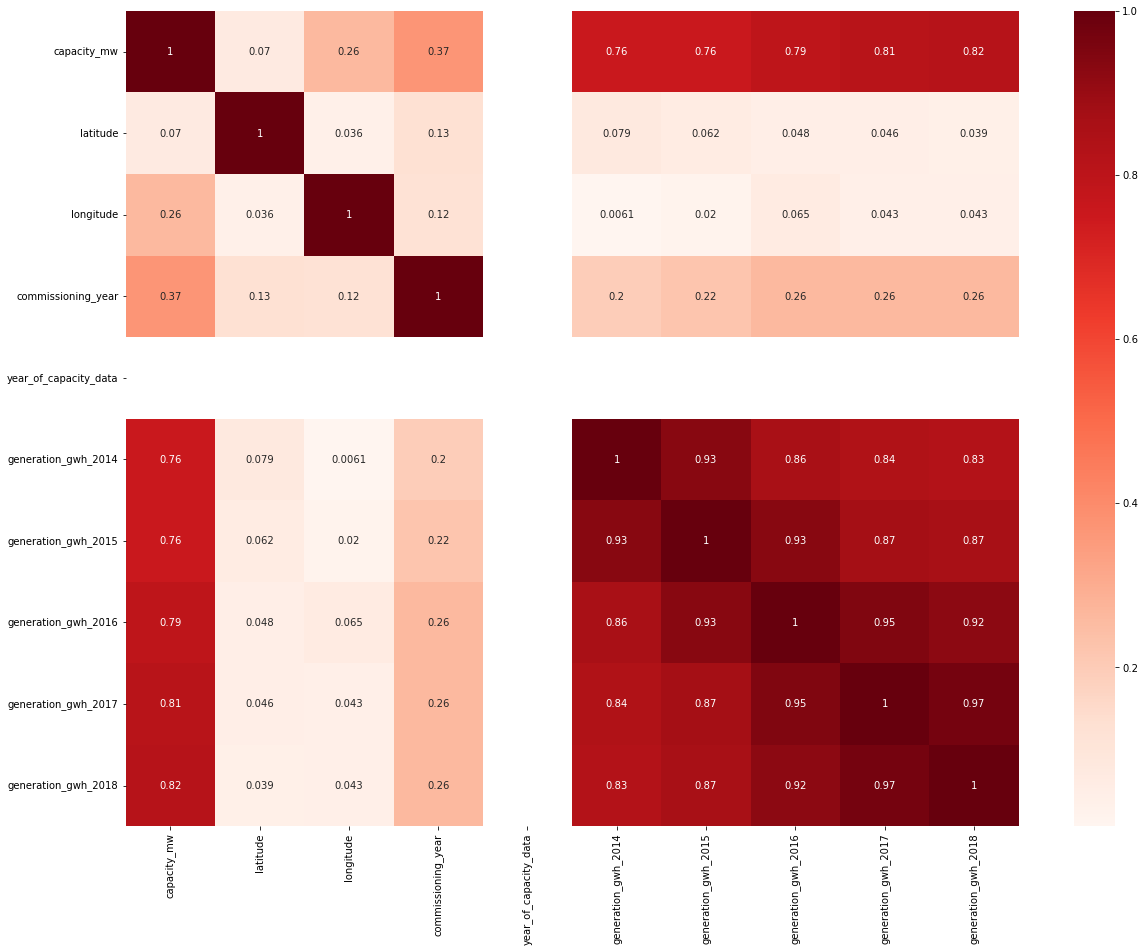

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

<AxesSubplot:>

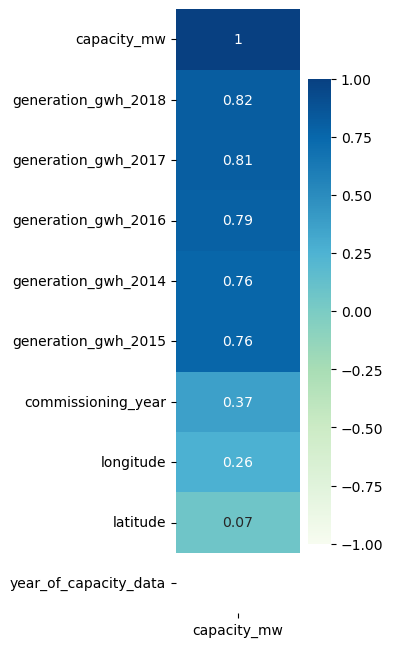

In [37]:
plt.figure(figsize=(2,8), dpi=100)
sns.heatmap(df.corr()[['capacity_mw']].sort_values(by='capacity_mw',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='GnBu')

### Observation - 
- There is strong relationship beween some of features.
- Using VIF, we can drop features with same importance levele/ beta.

## Dealing with Missing Values

In [38]:
df2 = df.copy()

In [39]:
df2.head()

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0       2.5000   28.1839    73.2407        Solar         NaN   
1      98.0000   24.7663    74.6090         Coal         NaN   
2      39.2000   21.9038    69.3732         Wind         NaN   
3     135.0000   23.8712    91.3602          Gas         NaN   
4     938.0375   21.9603    82.4091         Coal         Oil   

   commissioning_year                    geolocation_source  \
0              2011.0  National Renewable Energy Laboratory   
1                 NaN                                   WRI   
2                 NaN                                   WRI   
3              2004.0                                   WRI   
4              2015.0                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [40]:
df2.fillna(df2.median(), inplace=True)

In [41]:
df2.drop('other_fuel1', axis=1, inplace=True)

<AxesSubplot:>

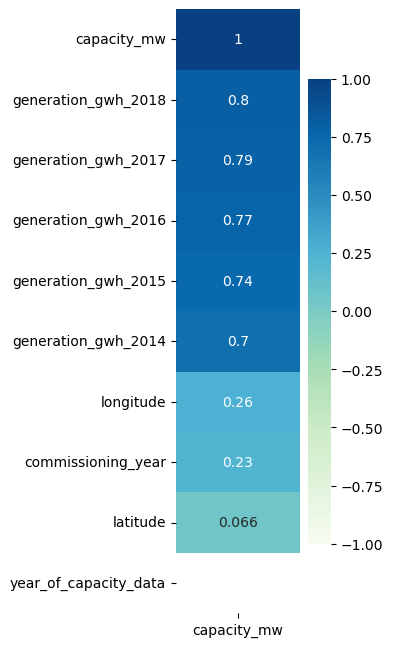

In [42]:
plt.figure(figsize=(2,8), dpi=100)
sns.heatmap(df2.corr()[['capacity_mw']].sort_values(by='capacity_mw',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='GnBu')

In [43]:
df2.dropna(inplace=True)

In [44]:
df2.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [45]:
df2.head(2)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal              2001.0   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                 2019.0   
1                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0           801.123775           711.181225            737.20545   
1           801.123775           711.181225            737.20545   

   generation_gwh_2017  generation_gwh_2018  
0            817.97725           751.644375  
1            817.97725           751.644375

In [46]:
le = LabelEncoder()

In [47]:
df2['primary_fuel']=le.fit_transform(df2['primary_fuel'])
df2['geolocation_source']=le.fit_transform(df2['geolocation_source'])

df2.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0       2.5000   28.1839    73.2407             6              2011.0   
1      98.0000   24.7663    74.6090             1              2001.0   
2      39.2000   21.9038    69.3732             7              2001.0   
3     135.0000   23.8712    91.3602             2              2004.0   
4     938.0375   21.9603    82.4091             1              2015.0   

   geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0                   1                 2019.0           801.123775   
1                   2                 2019.0           801.123775   
2                   2                 2019.0           801.123775   
3                   2                 2019.0           617.789264   
4                   2                 2019.0          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0           751.644375  
1           751.644375  
2           751.644375  
3           626.239128  
4          7279.000000

## VIF

In [116]:
y1 = df2['primary_fuel']

In [117]:
x1 = df2.drop('primary_fuel', axis=1)
x1

capacity_mw  latitude  longitude  commissioning_year  geolocation_source  \
0         2.5000   28.1839    73.2407              2011.0                   1   
1        98.0000   24.7663    74.6090              2001.0                   2   
2        39.2000   21.9038    69.3732              2001.0                   2   
3       135.0000   23.8712    91.3602              2004.0                   2   
4       938.0375   21.9603    82.4091              2015.0                   2   
5       250.0000   23.7689    68.6447              2005.0                   2   
6        60.0000   10.4547    77.0078              1970.0                   2   
7       192.0000   32.2258    77.2070              2010.0                   2   
8       290.0000   16.3300    75.8863              2004.0                   2   
9       210.0000   23.1642    81.6373              2008.0                   2   
10      938.0375   21.0782    77.9009              2014.0                   2   
11      134.0000   31.2717    76.4938              1985.0                   2   
12      938.0375   24.2007    82.8000              2011.0                   2   
13       16.9500   31.2412    77.8769              1986.0                   2   
14        9.0000   21.7800    76.7195              1987.0                   2   
15      938.0375   24.2010    82.7891              2000.0                   2   
16      419.3300   25.1797    76.3188              1989.0                   2   
17      600.0000   23.0666    81.7841              2001.0                   2   
18      938.0375   23.0655    81.7865              2015.0                   2   
19       10.0000   18.0845    76.1851              2001.0                   2   
20       17.0000   19.5867    74.7061              2001.0                   2   
21       24.0000   16.7708    74.9191              2001.0                   2   
22      652.0000   26.6282    79.5286              1989.0                   2   
23      600.0000   21.7438    83.2741              2017.0                   2   
24       46.0000   19.7881    79.1518              2001.0                   2   
26        1.0000   28.3615    74.2402              2001.0                   0   
27       16.5000   14.5751    76.3926              2001.0                   2   
28       50.0000   14.9455    77.6870              2001.0                   0   
29      113.6000   18.8580    73.6396              2001.0                   2   
30       19.8000   10.7245    77.1893              2001.0                   2   
31       13.2000   14.4791    76.3482              2001.0                   2   
32        5.0000   27.3473    71.6917              2001.0                   0   
33        5.0000   27.3600    71.6918              2001.0                   0   
34        5.0000   27.3632    71.6918              2001.0                   0   
35        5.0000   27.3661    71.6916              2001.0                   0   
36        5.0000   27.3537    71.6917              2001.0                   0   
37        5.0000   27.3504    71.6918              2001.0                   0   
38        5.0000   27.3566    71.6917              2001.0                   0   
39      705.0000   28.5060    77.3066              1977.0                   2   
40       28.0000   16.2804    75.2250              2001.0                   2   
41      450.0000   33.1815    75.3155              2008.0                   2   
42      450.0000   21.7800    76.7195              2015.0                   2   
43      180.0000   32.8063    76.1418              1980.0                   2   
44      938.0375   23.8285    87.4513              2003.0                   2   
45      600.0000   21.7800    76.7195              2015.0                   2   
46      510.0000   18.1396    82.1221              1984.0                   2   
47       67.5000   19.8601    79.3421              2001.0                   2   
48       10.0000   24.6929    74.6890              2001.0                   2   
49      300.0000   22.3421    82.430

In [101]:
df2.head(2)

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6              2011.0   
1         98.0   24.7663    74.6090             1              2001.0   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1           801.123775           711.181225   
1                   2           801.123775           711.181225   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            737.20545            817.97725           751.644375  
1            737.20545            817.97725           751.644375

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [118]:
calc_vif(x1)

variables  VIF FACTOR
0          capacity_mw    4.928078
1             latitude   13.748041
2            longitude  283.593362
3   commissioning_year  276.050448
4   geolocation_source    8.881356
5  generation_gwh_2014   13.844938
6  generation_gwh_2015   27.118523
7  generation_gwh_2016   31.563005
8  generation_gwh_2017   47.650721
9  generation_gwh_2018   34.241956

In [119]:
x1.drop('commissioning_year', axis=1, inplace=True)
calc_vif(x1)

variables  VIF FACTOR
0          capacity_mw    4.792917
1             latitude   13.308815
2            longitude   24.656146
3   geolocation_source    8.880097
4  generation_gwh_2014   13.811861
5  generation_gwh_2015   27.117694
6  generation_gwh_2016   31.506414
7  generation_gwh_2017   47.607962
8  generation_gwh_2018   34.241923

In [120]:
x1.skew()

capacity_mw            1.257185
latitude              -0.156703
longitude              1.142621
geolocation_source    -2.124035
generation_gwh_2014    2.537000
generation_gwh_2015    2.428738
generation_gwh_2016    2.393201
generation_gwh_2017    2.293001
generation_gwh_2018    2.229901
dtype: float64

<AxesSubplot:>

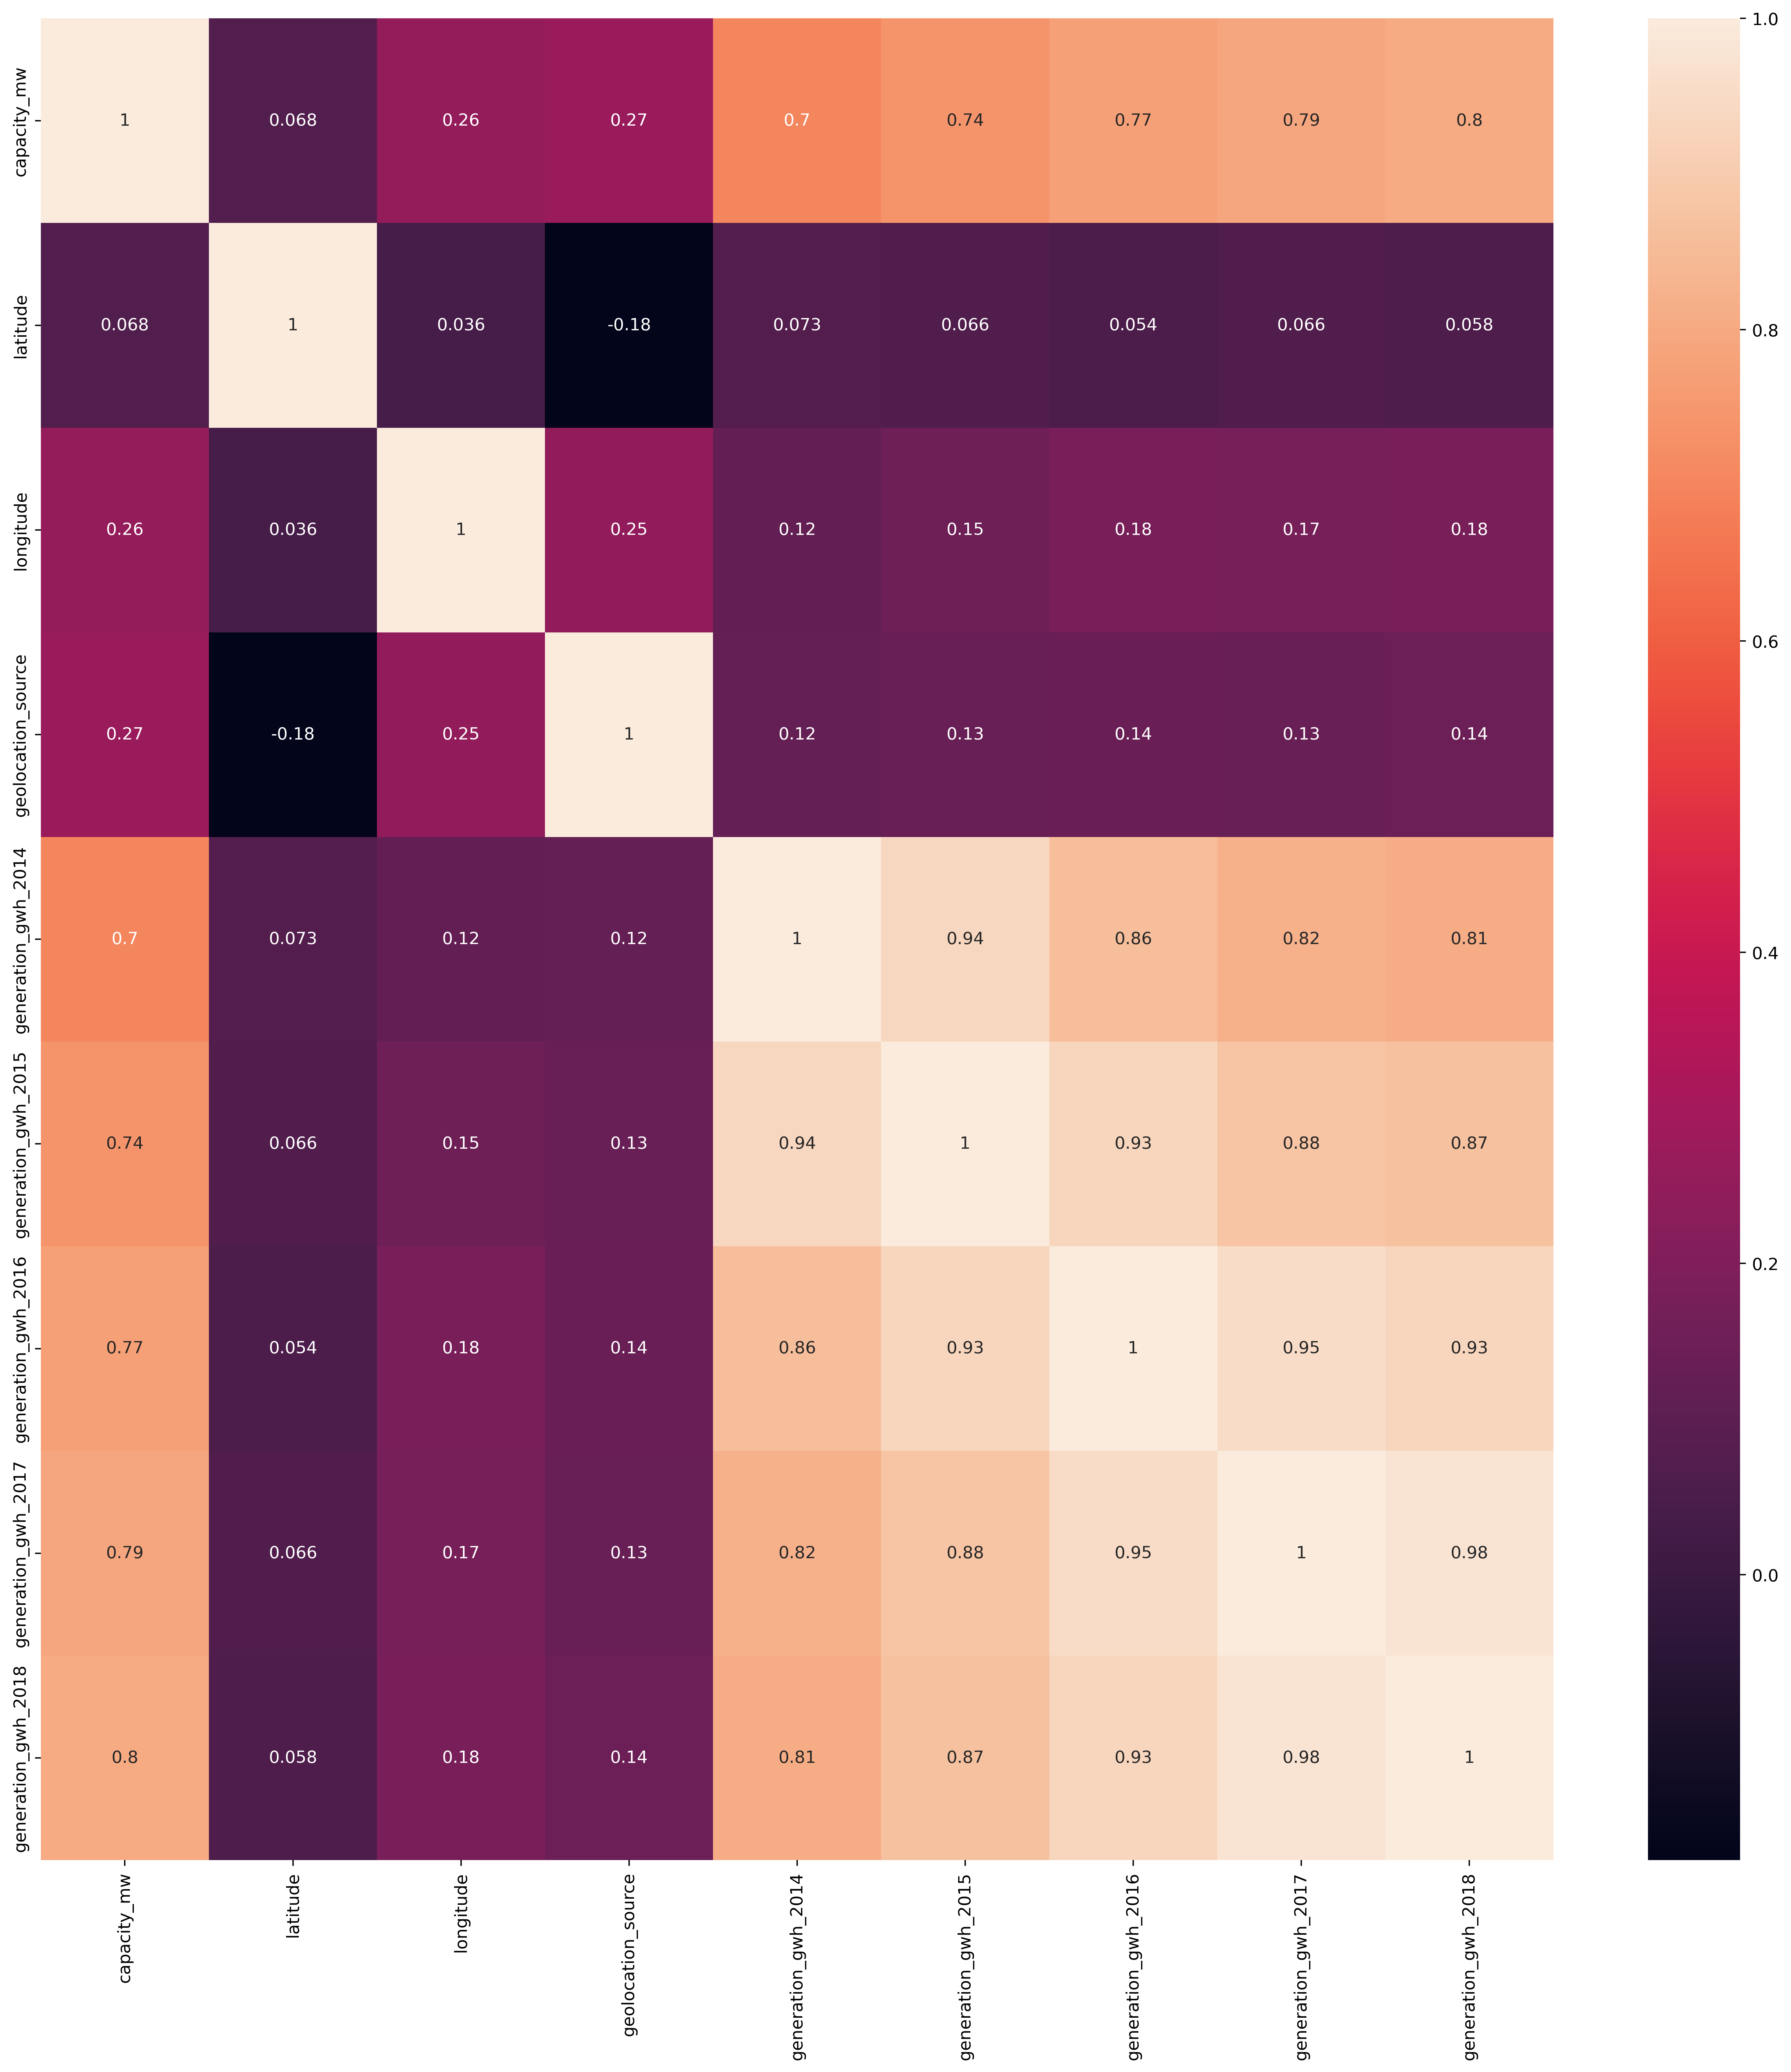

In [121]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(x1.corr(), annot=True)

# =================== Predicting Primary Fuel==================

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43)

In [123]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [124]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [138]:
for i in range(0,100):
    #evaluate each model in turn
    print('Random State ===============================', i, '===============================')
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        print('**************',name,'***********')
        print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        print(model)
        pred=model.predict(x_test)
        print('\n')
        acc=accuracy_score(y_test,pred)
        print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        print('Cross-val-score=',cv)
        cvs.append(cv*100)
        print('\n')
        

Random State =============================== 0 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.8033707865168539
Cross-val-score= 0.7183098591549296


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8089887640449438
Cross-val-score= 0.7760563380281691


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.6629213483146067
Cross-val-score= 0.5859154929577465


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.47191011235955055
Cross-val-score= 0.4126760563380282


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.5112359550561798
Cross-val-score= 0.4408450704225352


************** LinearSVC ***********


LinearSVC()


accuracy score 0.14606741573033707
Cross-val-score= 0.2647887323943662


************** GradientBoostingClassifier ***********


GradientBoost

GradientBoostingClassifier()


accuracy score 0.7584269662921348
Cross-val-score= 0.7450704225352113


************** GaussianNB ***********


GaussianNB()


accuracy score 0.47752808988764045
Cross-val-score= 0.528169014084507


Random State =============================== 7 ===============================
************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7134831460674157
Cross-val-score= 0.7267605633802818


************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.797752808988764
Cross-val-score= 0.7929577464788732


************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.5786516853932584
Cross-val-score= 0.6084507042253521


************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.43820224719101125
Cross-val-score= 0.4042253521126761


************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.4438202247191011
Cros

KeyboardInterrupt: 

In [139]:
# Gradient boosting classifier giving maximum accuracy = 84%, with random_state = 1, 

## Parameter Tuning

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [141]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [142]:
clf_gb.best_score_

0.7619718309859155

In [143]:
clf_gb.best_params_

{'n_estimators': 500}

In [144]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.294851      0.045203         0.006088        0.006375   

  param_n_estimators                 params  split0_test_score  \
0                500  {'n_estimators': 500}           0.802817   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.704225           0.746479           0.732394           0.830986   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.746479           0.774648           0.732394           0.816901   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.732394         0.761972         0.04006                1

In [145]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.848314606741573

In [160]:
# Save File
import pickle
file = 'gpp_pred_fuel_type'
#save file
save = pickle.dump(clf_gb,open(file,'wb'))

# =================== Predicting capacity_mw==================

In [146]:
y2 = df2['capacity_mw']
y2

0        2.5000
1       98.0000
2       39.2000
3      135.0000
4      938.0375
5      250.0000
6       60.0000
7      192.0000
8      290.0000
9      210.0000
10     938.0375
11     134.0000
12     938.0375
13      16.9500
14       9.0000
15     938.0375
16     419.3300
17     600.0000
18     938.0375
19      10.0000
20      17.0000
21      24.0000
22     652.0000
23     600.0000
24      46.0000
26       1.0000
27      16.5000
28      50.0000
29     113.6000
30      19.8000
31      13.2000
32       5.0000
33       5.0000
34       5.0000
35       5.0000
36       5.0000
37       5.0000
38       5.0000
39     705.0000
40      28.0000
41     450.0000
42     450.0000
43     180.0000
44     938.0375
45     600.0000
46     510.0000
47      67.5000
48      10.0000
49     300.0000
50     335.0000
51      12.0000
52     315.0000
53      30.0000
54      60.0000
55      20.0000
56      20.0000
57     938.0375
58      42.0000
59     720.0000
60      90.0000
61     938.0375
62      90.0000
63     2

In [147]:
x2 = df2.drop('capacity_mw', axis=1)
x2

latitude  longitude  primary_fuel  commissioning_year  \
0     28.1839    73.2407             6              2011.0   
1     24.7663    74.6090             1              2001.0   
2     21.9038    69.3732             7              2001.0   
3     23.8712    91.3602             2              2004.0   
4     21.9603    82.4091             1              2015.0   
5     23.7689    68.6447             1              2005.0   
6     10.4547    77.0078             3              1970.0   
7     32.2258    77.2070             3              2010.0   
8     16.3300    75.8863             3              2004.0   
9     23.1642    81.6373             1              2008.0   
10    21.0782    77.9009             1              2014.0   
11    31.2717    76.4938             3              1985.0   
12    24.2007    82.8000             1              2011.0   
13    31.2412    77.8769             3              1986.0   
14    21.7800    76.7195             3              1987.0   
15    24.2010    82.7891             1              2000.0   
16    25.1797    76.3188             2              1989.0   
17    23.0666    81.7841             1              2001.0   
18    23.0655    81.7865             1              2015.0   
19    18.0845    76.1851             0              2001.0   
20    19.5867    74.7061             0              2001.0   
21    16.7708    74.9191             0              2001.0   
22    26.6282    79.5286             2              1989.0   
23    21.7438    83.2741             1              2017.0   
24    19.7881    79.1518             1              2001.0   
26    28.3615    74.2402             6              2001.0   
27    14.5751    76.3926             7              2001.0   
28    14.9455    77.6870             6              2001.0   
29    18.8580    73.6396             7              2001.0   
30    10.7245    77.1893             7              2001.0   
31    14.4791    76.3482             7              2001.0   
32    27.3473    71.6917             6              2001.0   
33    27.3600    71.6918             6              2001.0   
34    27.3632    71.6918             6              2001.0   
35    27.3661    71.6916             6              2001.0   
36    27.3537    71.6917             6              2001.0   
37    27.3504    71.6918             6              2001.0   
38    27.3566    71.6917             6              2001.0   
39    28.5060    77.3066             1              1977.0   
40    16.2804    75.2250             0              2001.0   
41    33.1815    75.3155             3              2008.0   
42    21.7800    76.7195             3              2015.0   
43    32.8063    76.1418             3              1980.0   
44    23.8285    87.4513             1              2003.0   
45    21.7800    76.7195             1              2015.0   
46    18.1396    82.1221             3              1984.0   
47    19.8601    79.3421             1              2001.0   
48    24.6929    74.6890             1              2001.0   
49    22.3421    82.4305             1              2015.0   
50    22.9956    88.4042             1              1976.0   
51    32.1686    76.4695             3              1996.0   
52    24.1917    81.2875             3              1991.0   
53    24.1917    81.2875             3              2002.0   
54    24.1917    81.2875             3              2001.0   
55    24.2230    81.2747             3              2006.0   
56    23.6026    74.2562             1              2001.0   
57    21.9114    83.1889             1              2014.0   
58    23.8070    91.5650             2              2006.0   
59    25.3999    86.0218             1              2007.0   
60    22.9417    79.9250             3              1988.0   
61    25.4865    85.7452             1              2014.0   
62    28.4723    79.8066             1              2011.0   
63    27.8453    73.2000             1              2010.0   
64    13.1021    80.2682             

In [148]:
calc_vif(x2)

variables  VIF FACTOR
0             latitude   13.773912
1            longitude  294.704250
2         primary_fuel    4.667226
3   commissioning_year  326.196255
4   geolocation_source   10.588534
5  generation_gwh_2014   13.773467
6  generation_gwh_2015   27.129670
7  generation_gwh_2016   31.526232
8  generation_gwh_2017   47.649554
9  generation_gwh_2018   32.398010

In [149]:
x2.drop('commissioning_year', axis=1, inplace=True)
calc_vif(x2)

variables  VIF FACTOR
0             latitude   13.279879
1            longitude   34.259090
2         primary_fuel    3.841410
3   geolocation_source   10.352927
4  generation_gwh_2014   13.756694
5  generation_gwh_2015   27.125015
6  generation_gwh_2016   31.464315
7  generation_gwh_2017   47.624040
8  generation_gwh_2018   32.394366

In [150]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [153]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,200):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(x2,y2, test_size=0.33, random_state=i, shuffle=True)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

------------------------------------"" Linear Regression""------------------------------------ 


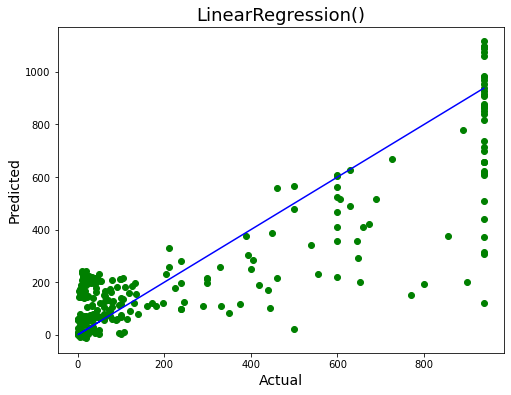

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.7608423787867971 2. Random_state 61 3. RMSE = 174.1443920499899
MAE 119.31661680827168
MSE 30326.26928246059
------------------------------------""Lasso""------------------------------------


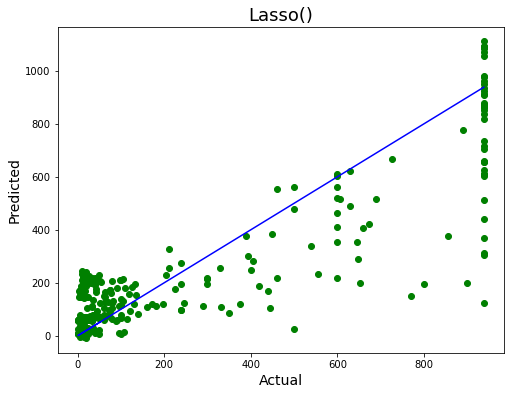

----------------------------<class 'sklearn.linear_model._coordinate_descent.Lasso'>----------------------------
1. Maximum score of 0.76366146485414 2. Random_state 61 3. RMSE = 174.21672405514815
MAE 119.38732571906607
MSE 30351.466940507635
------------------------------------""Ridge""------------------------------------ 


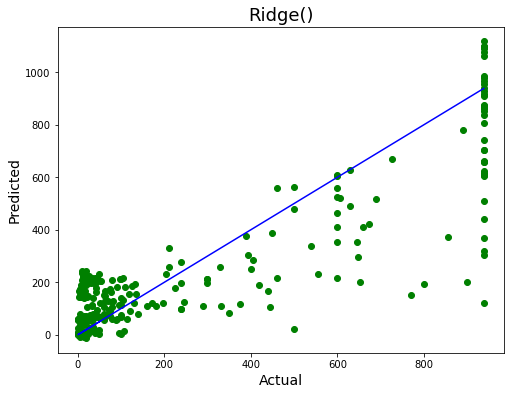

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.7612069187291803 2. Random_state 61 3. RMSE = 174.2705847610349
MAE 119.43546920144581
MSE 30370.236712953058
------------------------------------""ElasticNet""------------------------------------ 


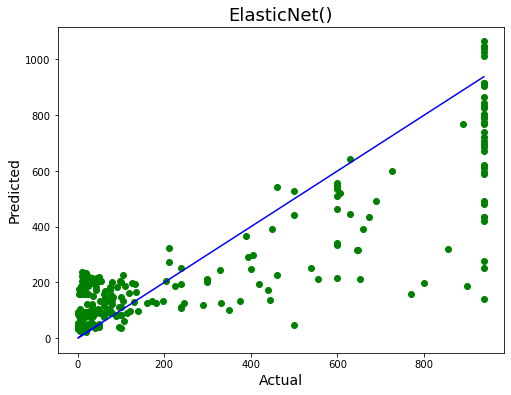

----------------------------<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>----------------------------
1. Maximum score of 0.7462961340604031 2. Random_state 61 3. RMSE = 182.75761630987043
MAE 131.2950548246715
MSE 33400.34631926582
------------------------------------""SVR""------------------------------------


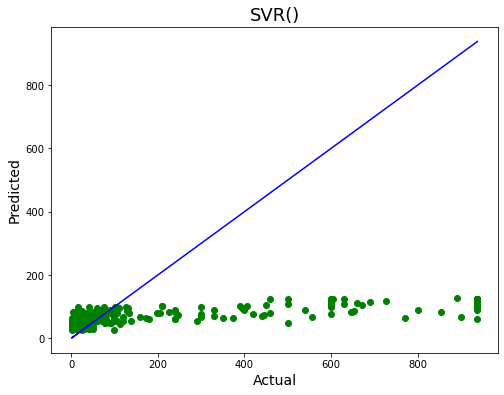

----------------------------<class 'sklearn.svm._classes.SVR'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 360.212253583987
MAE 211.354547356463
MSE 129752.86763205455
------------------------------------""DecisionTreeRegressor""------------------------------------


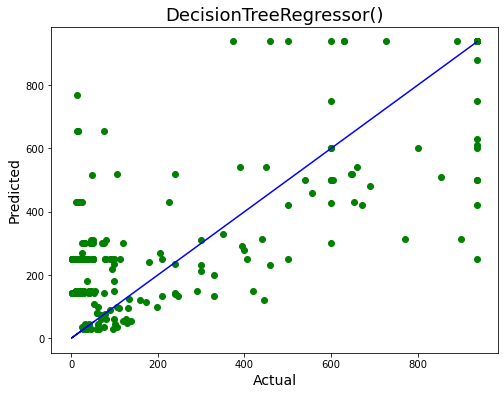

----------------------------<class 'sklearn.tree._classes.DecisionTreeRegressor'>----------------------------
1. Maximum score of 0.8332993846438408 2. Random_state 89 3. RMSE = 213.32324541829325
MAE 163.5734540816327
MSE 45506.80703579337
------------------------------------""RandomForestRegressor""------------------------------------


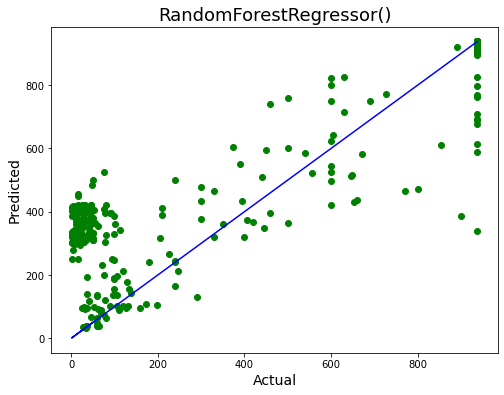

----------------------------<class 'sklearn.ensemble._forest.RandomForestRegressor'>----------------------------
1. Maximum score of 0.8643514081657813 2. Random_state 89 3. RMSE = 257.6201009510472
MAE 212.3128755612245
MSE 66368.11641402775
------------------------------------""KNeighborsRegressor""------------------------------------ 


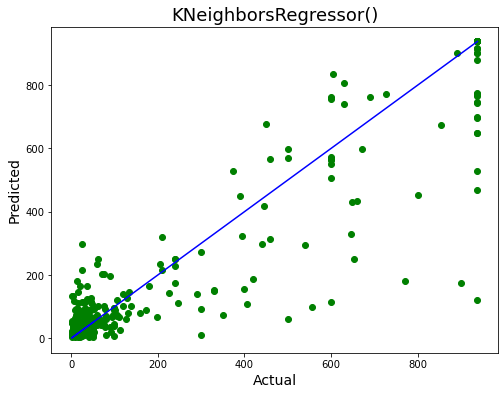

----------------------------<class 'sklearn.neighbors._regression.KNeighborsRegressor'>----------------------------
1. Maximum score of 0.898269526603544 2. Random_state 59 3. RMSE = 131.20119211637078
MAE 70.53549013605442
MSE 17213.752812756833
------------------------------------""SGDRegressor""------------------------------------


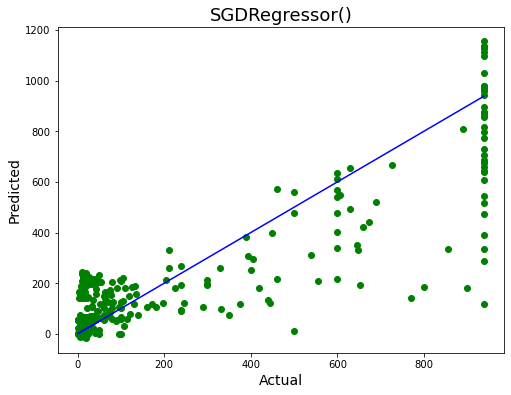

----------------------------<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>----------------------------
1. Maximum score of 0.7621683657937307 2. Random_state 61 3. RMSE = 175.32135322481668
MAE 119.53943317333871
MSE 30737.576896580937
------------------------------------""GradientBoostingRegressor""------------------------------------


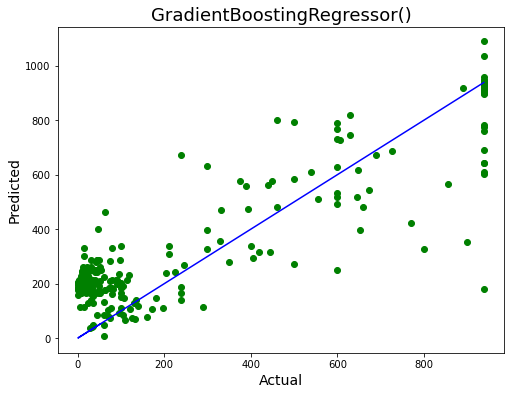

----------------------------<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>----------------------------
1. Maximum score of 0.8825723807105947 2. Random_state 38 3. RMSE = 175.23686233389466
MAE 145.59779291556515
MSE 30707.957920628352
------------------------------------""AdaBoostRegressor""------------------------------------


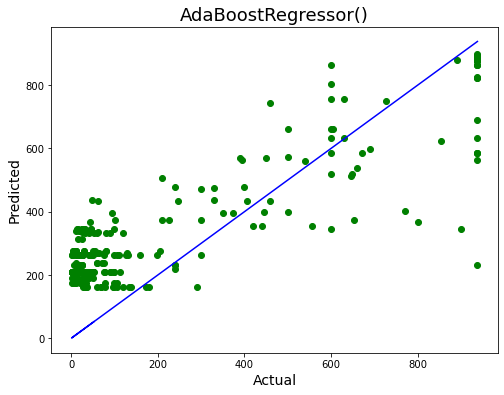

----------------------------<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>----------------------------
1. Maximum score of 0.8120684379440302 2. Random_state 158 3. RMSE = 197.57907182483706
MAE 173.31769038817532
MSE 39037.48962316412
------------------------------------""ExtraTreesRegressor""------------------------------------


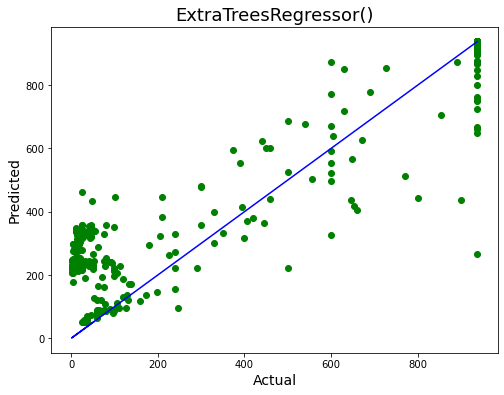

----------------------------<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>----------------------------
1. Maximum score of 0.8788831167474148 2. Random_state 18 3. RMSE = 202.51785642465515
MAE 168.24459313079774
MSE 41013.48217083723


In [154]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select(ExtraTreesRegressor)

# Parameter Tuning

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=38)

In [156]:
GBR = GradientBoostingRegressor()

In [157]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], 'subsample' : [0.9, 0.5, 0.2, 0.1], 'n_estimators' : [100,500,1000, 1500],'max_depth': [4,6,8,10]}

In [158]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [159]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=10, subsample=0.2)

 The best score across ALL searched params:
 0.8136033871495469

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.2}


In [162]:
# Save File
import pickle
file = 'gpp_pred_capacity_mw'
#save file
save = pickle.dump(grid_GBR,open(file,'wb'))